In [57]:
!pip install -r requirements.txt

  Using cached ptyprocess-0.6.0-py2.py3-none-any.whl (39 kB)
  Using cached helpdev-0.7.1-py3-none-any.whl (14 kB)
  Using cached PyQt5_sip-12.8.1-cp38-cp38-win_amd64.whl (63 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

## Inizializzazione del dataset

Il dataset è composto da due sotto file in formato .csv:
1. trainingData, è un dataframe pandas creato a partire dal file di training "train.csv"
2. testData, è un dataframe pandas creato a partire dal file di testing "test.csv"


In [2]:
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [3]:
trainData.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,75.0,1,246,0,15,0,127000.0,1.20,137,1,0,10
1,0,57.0,1,115,0,25,1,181000.0,1.10,144,1,0,79
2,0,70.0,0,618,0,35,0,327000.0,1.10,142,0,0,245
3,1,75.0,1,582,0,30,0,225000.0,1.83,134,1,0,113
4,0,66.0,1,72,0,40,1,242000.0,1.20,134,1,0,121


In [4]:
testData.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,53.0,0,196,0,60,0,220000.00,0.70,133,1,1,134
1,0,60.0,0,2261,0,35,1,228000.00,0.90,136,1,0,115
2,1,70.0,0,161,0,25,0,244000.00,1.20,142,0,0,66
3,1,70.0,0,582,0,20,1,263358.03,1.83,134,1,1,31
4,1,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4


## Controllo iniziale del TrainData set

Una volta caricato il TrainData set controllo che i dati presenti all'interno siano corretti, ovvero che non vi siano campi nulli o NaN. In questo caso la ricerca dei duplicati è futile poiché non abbiamo conoscenza sull'identità del paziente. 

In [5]:
missing_data = trainData.isnull()
for column in trainData:
    print(column)
    print(missing_data[column].value_counts())
    print('')

DEATH_EVENT
False    179
Name: DEATH_EVENT, dtype: int64

age
False    179
Name: age, dtype: int64

anaemia
False    179
Name: anaemia, dtype: int64

creatinine_phosphokinase
False    179
Name: creatinine_phosphokinase, dtype: int64

diabetes
False    179
Name: diabetes, dtype: int64

ejection_fraction
False    179
Name: ejection_fraction, dtype: int64

high_blood_pressure
False    179
Name: high_blood_pressure, dtype: int64

platelets
False    179
Name: platelets, dtype: int64

serum_creatinine
False    179
Name: serum_creatinine, dtype: int64

serum_sodium
False    179
Name: serum_sodium, dtype: int64

sex
False    179
Name: sex, dtype: int64

smoking
False    179
Name: smoking, dtype: int64

time
False    179
Name: time, dtype: int64



In [6]:
NaN_data = trainData.isna()
for column in trainData:
    print(column)
    print(NaN_data[column].value_counts())
    print('')

DEATH_EVENT
False    179
Name: DEATH_EVENT, dtype: int64

age
False    179
Name: age, dtype: int64

anaemia
False    179
Name: anaemia, dtype: int64

creatinine_phosphokinase
False    179
Name: creatinine_phosphokinase, dtype: int64

diabetes
False    179
Name: diabetes, dtype: int64

ejection_fraction
False    179
Name: ejection_fraction, dtype: int64

high_blood_pressure
False    179
Name: high_blood_pressure, dtype: int64

platelets
False    179
Name: platelets, dtype: int64

serum_creatinine
False    179
Name: serum_creatinine, dtype: int64

serum_sodium
False    179
Name: serum_sodium, dtype: int64

sex
False    179
Name: sex, dtype: int64

smoking
False    179
Name: smoking, dtype: int64

time
False    179
Name: time, dtype: int64



## Controllo iniziale del TestData set

Una volta caricato il TrainData set controllo che i dati presenti all'interno siano corretti, ovvero che non vi siano campi nulli o NaN. In questo caso la ricerca dei duplicati è futile poiché non abbiamo conoscenza sull'identità del paziente. 

In [7]:
missing_data = testData.isnull()
for column in testData:
    print(column)
    print(missing_data[column].value_counts())
    print('')

DEATH_EVENT
False    60
Name: DEATH_EVENT, dtype: int64

age
False    60
Name: age, dtype: int64

anaemia
False    60
Name: anaemia, dtype: int64

creatinine_phosphokinase
False    60
Name: creatinine_phosphokinase, dtype: int64

diabetes
False    60
Name: diabetes, dtype: int64

ejection_fraction
False    60
Name: ejection_fraction, dtype: int64

high_blood_pressure
False    60
Name: high_blood_pressure, dtype: int64

platelets
False    60
Name: platelets, dtype: int64

serum_creatinine
False    60
Name: serum_creatinine, dtype: int64

serum_sodium
False    60
Name: serum_sodium, dtype: int64

sex
False    60
Name: sex, dtype: int64

smoking
False    60
Name: smoking, dtype: int64

time
False    60
Name: time, dtype: int64



In [8]:
NaN_data = testData.isna()
for column in testData:
    print(column)
    print(NaN_data[column].value_counts())
    print('')

DEATH_EVENT
False    60
Name: DEATH_EVENT, dtype: int64

age
False    60
Name: age, dtype: int64

anaemia
False    60
Name: anaemia, dtype: int64

creatinine_phosphokinase
False    60
Name: creatinine_phosphokinase, dtype: int64

diabetes
False    60
Name: diabetes, dtype: int64

ejection_fraction
False    60
Name: ejection_fraction, dtype: int64

high_blood_pressure
False    60
Name: high_blood_pressure, dtype: int64

platelets
False    60
Name: platelets, dtype: int64

serum_creatinine
False    60
Name: serum_creatinine, dtype: int64

serum_sodium
False    60
Name: serum_sodium, dtype: int64

sex
False    60
Name: sex, dtype: int64

smoking
False    60
Name: smoking, dtype: int64

time
False    60
Name: time, dtype: int64



## Controllo dettagliato del trainData set

Una volta controllata la presenza di valori nulli o duplicati all'interno del dataset è possibile analizzarne nel dettaglio le varie colonne. Questa analisi supporta la successiva operazione di feature selection.

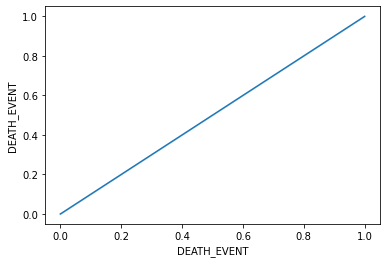

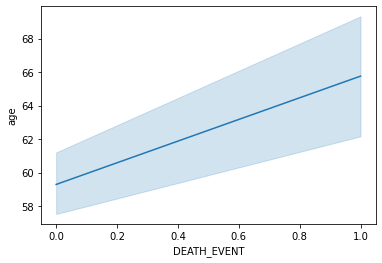

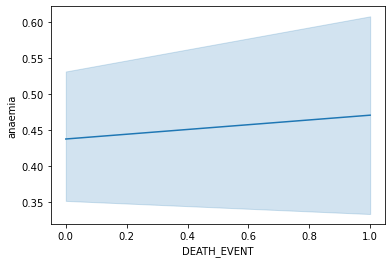

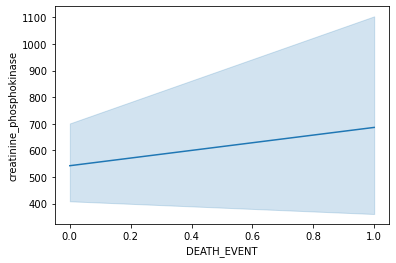

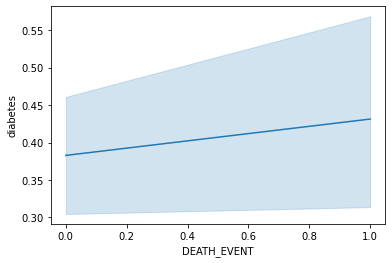

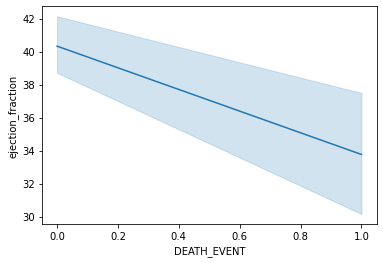

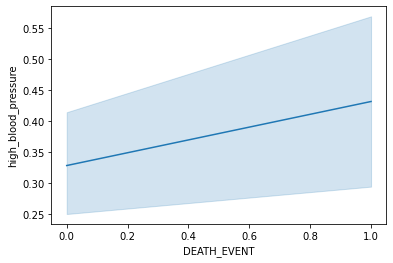

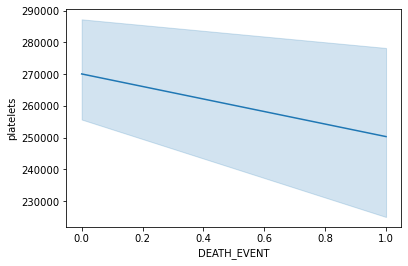

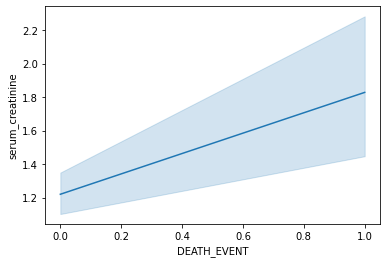

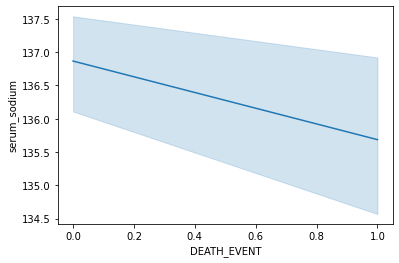

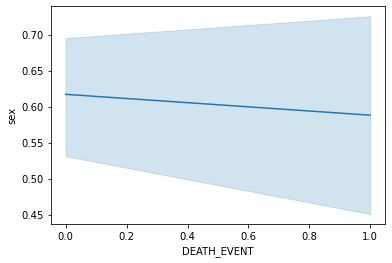

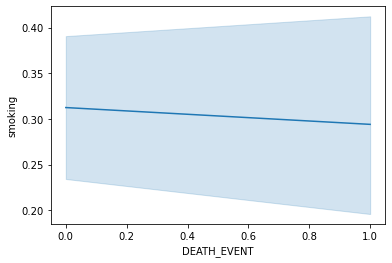

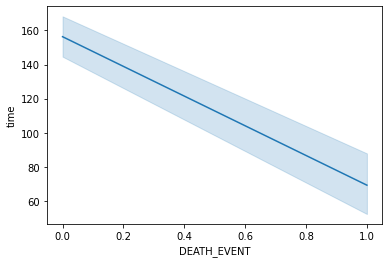

In [9]:
for i, col in enumerate(trainData.columns):
    plt.figure(i)
    sns.lineplot(x='DEATH_EVENT',y=col, data=trainData)

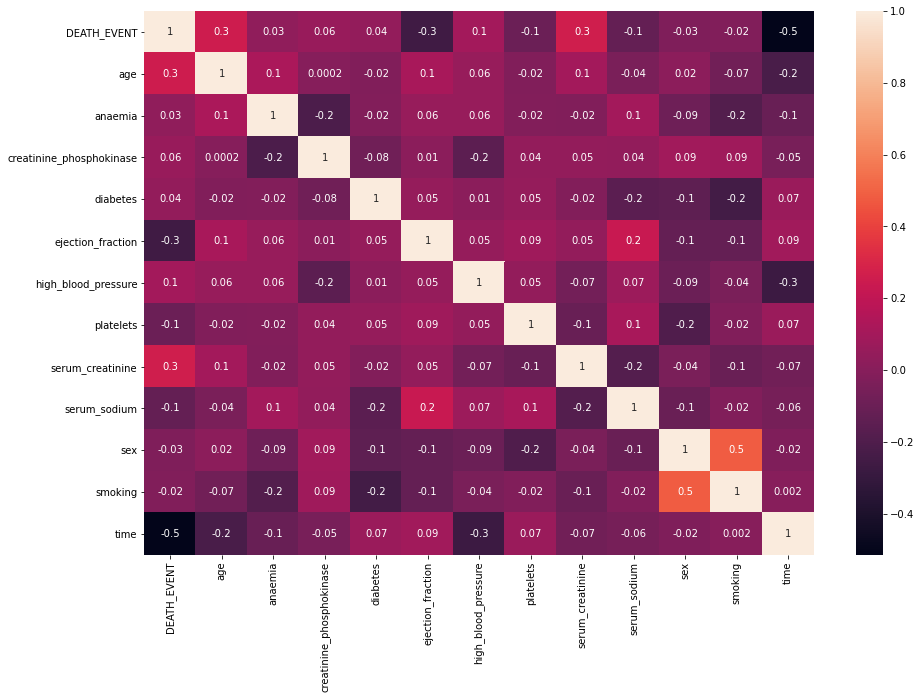

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(trainData.corr(), annot=True, fmt='.1g');

In [11]:
correlation = trainData.corr()
correlation_target = abs(correlation["DEATH_EVENT"])
features = correlation_target[correlation_target > 0.1]
features

DEATH_EVENT          1.000000
age                  0.250219
ejection_fraction    0.255956
serum_creatinine     0.262559
serum_sodium         0.123870
time                 0.514434
Name: DEATH_EVENT, dtype: float64

L'analisi della heatmap e della corrleazione tra le varie condizioni mediche del paziente fanno emergere un forte collegamento tra la possibile morte durante il periodo di osservazione con le seguenti caratteristiche:
1. L'età del paziente
2. La Ejection Fraction, ovvero la frazione di eiezione è la frazione volumetrica del fluido espulsa da una camera ad ogni contrazione, un valore normale è compreso tra 50 e 75 
3. la concentrazione nel siero di creatina e sodio
4. Il tempo di osservazione, più il paziente è sotto osservazione e più è probabile che sia posssibile tenere traccia di un possibile un arresto cardiaco

L'analisi dei grafici valida questa decisione, inoltre si nota come la feature "smoking" e "sex" potrebbero essere correlate tra loro, ovvero che l'incidenza di arresti cardiaci potrebbe anche essere collegata al binomio genere-fumatore

Istanzio una struttura dati chiamata selectedFeatures all'interno della quale inserisco le label delle feature scelte in seguito all'analisi dei dati.

In [12]:
selected_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "serum_creatinine", "serum_sodium", "time"]

## Feature Scaling

Dall'analisi del dataset si nota come vi siano delle colonne che usano scale diverse, è conveniente riportarle tutte nella stessa scala di misura. Nello specifico le colonne in questione sono:
1. platelets
2. creatinine_phosphokinase
3. ejection_fraction
4. serum_sodium

La colonna time viene lasciata così com'è poiché rappresenta il numero di giorni in cui il paziente è stato ricoverato.

Per allineare la loro scala di misura sfrutto la funzionalità offerta di sklearn MinMaxScaler. Il suo funzionamento si basa sulla definizione di un range all'interno del quale andare a scalare i valori delle colonne passate come input. Il range di default è [0,1]

Transform è il contenitore della nostra trasformazione, vengono definiti al suo interno:
1. Nome trasformazione
2. La funzione di trasformazione, nel nostro caso MinMaxScaler()
3. Le colonne interessate dalla nostra trasformazione

Inoltre viene utilizzata la ColumnTransformer, la quale permette di applicare MinMaxScaler alle varie colonne, supportando la funzionalità di passthrough, ovvero la possibilità di tralasciare dalla trasformazione le colonne non specificate. 

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [14]:
transform = [
    ['MinMaxScaler', MinMaxScaler(),
     ['platelets','creatinine_phosphokinase','ejection_fraction','serum_sodium']]
]

In [15]:
transformFunction = ColumnTransformer(transform, remainder='passthrough')

In [16]:
scaledTrainingSet = pd.DataFrame(transformFunction.fit_transform(trainData))

In [17]:
scaledTestSet = pd.DataFrame(transformFunction.fit_transform(testData))

In [18]:
scaledTrainingSet.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.115108,0.028451,0.000000,0.727273,1.0,75.0,1.0,0.0,0.0,1.20,1.0,0.0,10.0
1,0.192806,0.011738,0.181818,0.939394,0.0,57.0,1.0,0.0,1.0,1.10,1.0,0.0,79.0
2,0.402878,0.075912,0.363636,0.878788,0.0,70.0,0.0,0.0,0.0,1.10,0.0,0.0,245.0
3,0.256115,0.071319,0.272727,0.636364,1.0,75.0,1.0,0.0,0.0,1.83,1.0,0.0,113.0
4,0.280576,0.006252,0.454545,0.636364,0.0,66.0,1.0,0.0,1.0,1.20,1.0,0.0,121.0


In [41]:
scaledTestSet.head()

,platelets,creatinine_phosphokinase,ejection_fraction,serum_sodium,DEATH_EVENT,age,anaemia,diabetes,high_blood_pressure,serum_creatinine,sex,smoking,time
0,0.309829,0.049744,0.666667,0.607143,0.0,53.0,0.0,0.0,0.0,0.70,1.0,1.0,134.0
1,0.326923,0.805048,0.250000,0.714286,0.0,60.0,0.0,0.0,1.0,0.90,1.0,0.0,115.0
2,0.361111,0.036942,0.083333,0.928571,1.0,70.0,0.0,0.0,0.0,1.20,0.0,0.0,66.0
3,0.402474,0.190929,0.000000,0.642857,1.0,70.0,0.0,0.0,1.0,1.83,1.0,1.0,31.0
4,0.405983,0.190929,0.000000,0.500000,1.0,75.0,0.0,0.0,1.0,1.90,1.0,0.0,4.0


Come si può notare l'operazione di MinMax ha effettivamente riportato i valori in un intervallo [0,1], tuttavia l'operazione ha eliminato i nomi delle colonne ed ha concatenato le colonne trasformate davanti a quelle tralasciate dall'operazione. Dobbiamo necessariamente ripristinare le labels delle features per poterle utilizzare nel mnostro modello. 

In [39]:
scaledTrainingSet.columns=['platelets','creatinine_phosphokinase','ejection_fraction','serum_sodium','DEATH_EVENT', 'age', 'anaemia', 'diabetes', 'high_blood_pressure', 'serum_creatinine', 'sex', 'smoking', 'time']

In [40]:
scaledTestSet.columns=['platelets','creatinine_phosphokinase','ejection_fraction','serum_sodium','DEATH_EVENT','age', 'anaemia', 'diabetes', 'high_blood_pressure', 'serum_creatinine', 'sex', 'smoking', 'time']

## Inizializzazione Modello: RandomForest

Il modello scelto è un classificatore RandomForest. Il classificatore RandomForest utilizza diversi classificatori Decision Tree su diversi sotto campioni del dataset di input. Ogni classificatore compierà un'operazione di fitting sul suo sottocampione. Il classificatore RandomForest utilizzerà una funzione di averaging, ovvero fa la media tra le varie predizioni, per migliorare l'accuratezza e tenere sotto controllo l'overfitting. 

Un Decision tree classifier ha il compito di predirre il valore della variabile target, nel nostro caso DEATH_EVENT, apprendendo delle regole di decisione a partire dalle feature del nostro dataset

Il classificatore viene poi valutato in accuratezza, tramite la metrica accuracy_score, sia sul dataset di training che su quello di test.

In [42]:
datasetTrain = trainData[selected_features]

In [43]:
datasetTest = testData[selected_features]

In [44]:
y_train = trainData["DEATH_EVENT"]

In [45]:
y_test = testData["DEATH_EVENT"]

In [46]:
clf = RandomForestClassifier(max_depth=10, n_estimators=32, random_state=42)

In [47]:
clf.fit(datasetTrain, y_train)

RandomForestClassifier(max_depth=10, n_estimators=32, random_state=42)

In [48]:
predict_TrainingSet = clf.predict(datasetTrain)

In [49]:
predict_TestSet = clf.predict(datasetTest)

### Accuratezza

L'accuratezza viene calcolata usando le previsioni prodotte dal modello sia sul trainingSet che sul testSet.

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print("Training set accuracy: {:.2f}".format(clf.score(datasetTrain, y_train)))

Training set accuracy: 1.00


In [52]:
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, predict_TestSet)))

Test set accuracy: 0.88


Text(0.5, 15.0, 'Prediction')

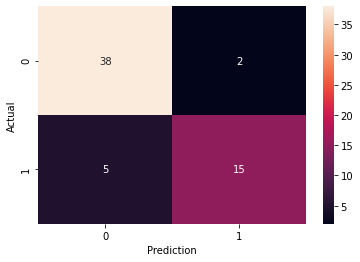

In [53]:
sns.heatmap(confusion_matrix(y_test, predict_TestSet),annot=True)
plt.ylabel("Actual")
plt.xlabel("Prediction")

Il nostro dataset è caratterizzato da una ridotta quantità di dati, questo comporta un rischio di overfitting che potrebbe inficiare le prestazioni del nostro modello. Per controllarne la validità possiamo effettuare un controllo sulla sua accuratezza sfruttando la K-Fold Cross Validation, nello specifico la 10-Fold Cross Validation.

Inoltre è da notare come il dataset sia sbilanciato verso i dati relativi alle persone che non hanno subito arresti cardiaci, ovvero la presenza di dati relativi ai decessi è molto esigua e questo potrebbe inficiare sul processo di addestramento. 

In [34]:
from sklearn.model_selection import cross_val_score

In [54]:
scores = cross_val_score(clf, datasetTest, y_test, cv=10)

In [55]:
print("Accuracy using K-Fold Cross Validation, with k=10 : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy using K-Fold Cross Validation, with k=10 : 0.88 (+/- 0.26)


In [56]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
